In [90]:
import requests
import pandas as pd
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 50)

In [95]:
names = ['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Buffalo Bills',
         'Carolina Panthers', 'Chicago Bears', 'Cincinnati Bengals', 'Cleveland Browns',
         'Dallas Cowboys', 'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
         'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars', 'Kansas City Chiefs',
         'LA Chargers', 'LA Rams', 'Miami Dolphins', 'Minnesota Vikings', 'New York Giants',
         'New York Jets', 'New England Patriots', 'New Orleans Saints', 'Oakland Raiders', 
         'Philadelphia Eagles', 'Pittsburgh Steelers', 'San Francisco 49ers', 
         'Seattle Seahawks', 'Tampa Bay Buccaneers', 'Tennessee Titans', 'Washington Redskins']

In [16]:
def scrape(year):
    
    
    url_start = 'http://www.espn.com/nfl/statistics/team/_/stat/'
    df = pd.read_html(url_start+ 'total/year/' + str(year))[0]
    df.columns = df.iloc[0]
    df = df.drop([0])
    df = df.drop(columns=['RK'])
    df['Year'] = year
    new_names = [(i,'O_' + i ) for i in df.iloc[:, 1:-1].columns.values]
    df.rename(columns = dict(new_names), inplace=True)
    
    df_de = pd.read_html(url_start + 'total/position/defense/year/'+ str(year))[0]
    df_de.columns = df_de.iloc[0]
    df_de = df_de.drop([0])
    df_de = df_de.drop(columns=['RK'])
    new_names = [(i,'D_' + i ) for i in df_de.iloc[:, 1:-1].columns.values]
    df_de.rename(columns = dict(new_names), inplace=True)
    
    df_ds = pd.read_html(url_start + 'defense/year/' + str(year))[0]
    df_ds.columns = df_ds.iloc[1]
    df_ds = df_ds.drop([0,1])
    df_ds = df_ds.drop(columns=['RK'])
    df_ds.head()
    
    df_da = pd.read_html(url_start + 'defense/position/defense/year/' + str(year))[0]
    df_da.columns = df_da.iloc[1]
    df_da = df_da.drop([0,1])
    df_da = df_da.drop(columns=['RK'])
    new_names = [(i, i + '_A') for i in df_da.iloc[:, 1:].columns.values]
    df_da.rename(columns = dict(new_names), inplace=True)
    df_da.head()

    dfs = [df, df_de, df_ds, df_da]
    df_ready = reduce(lambda left,right: pd.merge(left,right,on='TEAM'), dfs)
    df_ready = df_ready.sort_values(by=['TEAM'])
    df_ready['NAME'] = [i.split(' ')[-1] for i in names]
    
    dfs = pd.read_html('http://www.espn.com/nfl/standings/_/season/'+str(year)+'/group/league')
    df_con = pd.concat([dfs[1] , dfs[3]], axis=1)
    df_con['NAME'] = [i.split(' ')[-1] for i in df_con[0]]
    df_con.drop(columns = [0, 'HOME', 'AWAY', 'DIV', 'CONF', 'PF', 'PA',
                           'DIFF', 'STRK'], inplace = True)
    
    df_final = pd.merge(df_con, df_ready, how='outer', on='NAME')
    return df_final

In [21]:
def combine_scrape(start_year, end_year):
    years = list(range(start_year, end_year+1))
    combined_df = pd.DataFrame()
    
    for year in years:
        temp_df = scrape(year)
        combined_df = combined_df.append(temp_df)
        
    combined_df = combined_df.reset_index(drop=True)
    return combined_df

In [22]:
df = combine_scrape(2002, 2018)

In [145]:
df.head()

,W,L,T,PCT,NAME,TEAM,O_YDS,O_YDS/G,O_PASS,O_P YDS/G,O_RUSH,O_R YDS/G,O_PTS,O_PTS/G,Year,D_YDS,D_YDS/G,D_PASS,D_P YDS/G,D_RUSH,D_R YDS/G,D_PTS,PTS/G,SOLO,AST,TOTAL,SACK,YDSL,PD,INT,YDS,LONG,TD_INT,FF,REC,TD_FUM,SOLO_A,AST_A,TOTAL_A,SACK_A,YDSL_A,PD_A,INT_A,YDS_A,LONG_A,TD_INT_A,FF_A,REC_A,TD_FUM_A
0,12.0,4.0,0.0,0.750,Eagles,Philadelphia,5604.0,350.3,3384.0,211.5,2220.0,138.8,415.0,25.9,2002,4754.0,297.1,3094.0,193.4,1660.0,103.8,241.0,15.1,792.0,220.0,1012.0,56.0,348.0,230.0,15.0,193.0,80.0,2.0,29.0,22.0,1.0,826.0,305.0,1131.0,36.0,222.0,230.0,11.0,86.0,35.0,0.0,21.0,13.0,1.0
1,12.0,4.0,0.0,0.750,Packers,Green Bay,5560.0,347.5,3627.0,226.7,1933.0,120.8,398.0,24.9,2002,4985.0,311.6,2987.0,186.7,1998.0,124.9,328.0,20.5,798.0,307.0,1105.0,43.0,241.0,244.0,24.0,516.0,89.0,4.0,22.0,21.0,0.0,883.0,362.0,1245.0,27.0,196.0,219.0,16.0,327.0,65.0,0.0,15.0,12.0,1.0
2,12.0,4.0,0.0,0.750,Buccaneers,Tampa Bay,5002.0,312.6,3445.0,215.3,1557.0,97.3,346.0,21.6,2002,4044.0,252.8,2490.0,155.6,1554.0,97.1,196.0,12.3,788.0,223.0,1011.0,43.0,295.0,251.0,31.0,494.0,97.0,4.0,18.0,7.0,1.0,831.0,314.0,1145.0,41.0,220.0,219.0,10.0,143.0,51.0,3.0,21.0,11.0,0.0
3,11.0,5.0,0.0,0.688,Titans,Tennessee,5272.0,329.5,3320.0,207.5,1952.0,122.0,367.0,22.9,2002,4964.0,310.3,3540.0,221.3,1424.0,89.0,324.0,20.3,778.0,214.0,992.0,40.0,213.0,223.0,18.0,198.0,32.0,3.0,15.0,11.0,1.0,851.0,224.0,1075.0,21.0,121.0,194.0,15.0,179.0,82.0,2.0,11.0,10.0,0.0
4,11.0,5.0,0.0,0.688,Raiders,Oakland,6237.0,389.8,4475.0,279.7,1762.0,110.1,450.0,28.1,2002,4979.0,311.2,3526.0,220.4,1453.0,90.8,304.0,19.0,827.0,186.0,1013.0,43.0,261.0,224.0,21.0,347.0,98.0,3.0,11.0,10.0,0.0,907.0,270.0,1177.0,36.0,214.0,201.0,10.0,226.0,84.0,1.0,17.0,9.0,0.0


In [131]:
cols = []
count = 1
for column in df.columns:
    if column == 'TD_A':
        cols.append('TD_A_'+ str(count))
        count+=1
        continue
    cols.append(column)
df.columns = cols
cols.remove('NAME')
cols.remove('TEAM')

In [138]:
df[cols] = df[cols].astype(float)
df['Year'] = df['Year'].astype(int)

In [133]:
df.rename(columns={'TD_1': 'TD_INT',
                  'TD_2': 'TD_FUM',
                  'TD_A_1': 'TD_INT_A',
                  'TD_A_2': 'TD_FUM_A'},
         inplace = True)

In [ ]:
df.to_csv('df.csv')

In [3]:
df1 = pd.read_csv('df.csv')

In [5]:
df1 = df1.drop(columns=['Unnamed: 0'])

In [6]:
df1.head()

,W,L,T,PCT,NAME,TEAM,O_YDS,O_YDS/G,O_PASS,O_P YDS/G,O_RUSH,O_R YDS/G,O_PTS,O_PTS/G,Year,D_YDS,D_YDS/G,D_PASS,D_P YDS/G,D_RUSH,D_R YDS/G,D_PTS,PTS/G,SOLO,AST,TOTAL,SACK,YDSL,PD,INT,YDS,LONG,TD_INT,FF,REC,TD_FUM,SOLO_A,AST_A,TOTAL_A,SACK_A,YDSL_A,PD_A,INT_A,YDS_A,LONG_A,TD_INT_A,FF_A,REC_A,TD_FUM_A
0,12.0,4.0,0.0,0.750,Eagles,Philadelphia,5604.0,350.3,3384.0,211.5,2220.0,138.8,415.0,25.9,2002,4754.0,297.1,3094.0,193.4,1660.0,103.8,241.0,15.1,792.0,220.0,1012.0,56.0,348.0,230.0,15.0,193.0,80.0,2.0,29.0,22.0,1.0,826.0,305.0,1131.0,36.0,222.0,230.0,11.0,86.0,35.0,0.0,21.0,13.0,1.0
1,12.0,4.0,0.0,0.750,Packers,Green Bay,5560.0,347.5,3627.0,226.7,1933.0,120.8,398.0,24.9,2002,4985.0,311.6,2987.0,186.7,1998.0,124.9,328.0,20.5,798.0,307.0,1105.0,43.0,241.0,244.0,24.0,516.0,89.0,4.0,22.0,21.0,0.0,883.0,362.0,1245.0,27.0,196.0,219.0,16.0,327.0,65.0,0.0,15.0,12.0,1.0
2,12.0,4.0,0.0,0.750,Buccaneers,Tampa Bay,5002.0,312.6,3445.0,215.3,1557.0,97.3,346.0,21.6,2002,4044.0,252.8,2490.0,155.6,1554.0,97.1,196.0,12.3,788.0,223.0,1011.0,43.0,295.0,251.0,31.0,494.0,97.0,4.0,18.0,7.0,1.0,831.0,314.0,1145.0,41.0,220.0,219.0,10.0,143.0,51.0,3.0,21.0,11.0,0.0
3,11.0,5.0,0.0,0.688,Titans,Tennessee,5272.0,329.5,3320.0,207.5,1952.0,122.0,367.0,22.9,2002,4964.0,310.3,3540.0,221.3,1424.0,89.0,324.0,20.3,778.0,214.0,992.0,40.0,213.0,223.0,18.0,198.0,32.0,3.0,15.0,11.0,1.0,851.0,224.0,1075.0,21.0,121.0,194.0,15.0,179.0,82.0,2.0,11.0,10.0,0.0
4,11.0,5.0,0.0,0.688,Raiders,Oakland,6237.0,389.8,4475.0,279.7,1762.0,110.1,450.0,28.1,2002,4979.0,311.2,3526.0,220.4,1453.0,90.8,304.0,19.0,827.0,186.0,1013.0,43.0,261.0,224.0,21.0,347.0,98.0,3.0,11.0,10.0,0.0,907.0,270.0,1177.0,36.0,214.0,201.0,10.0,226.0,84.0,1.0,17.0,9.0,0.0


0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 0
1 1
1 2
1 3
1 4
1 5
1 6
2 0
2 1
2 2
2 3
2 4
2 5
2 6
3 0
3 1
3 2
3 3
3 4
3 5
3 6
4 0
4 1
4 2
4 3
4 4
4 5
4 6
5 0
5 1
5 2
5 3
5 4
5 5
5 6
6 0
6 1
6 2
6 3
6 4
6 5
6 6


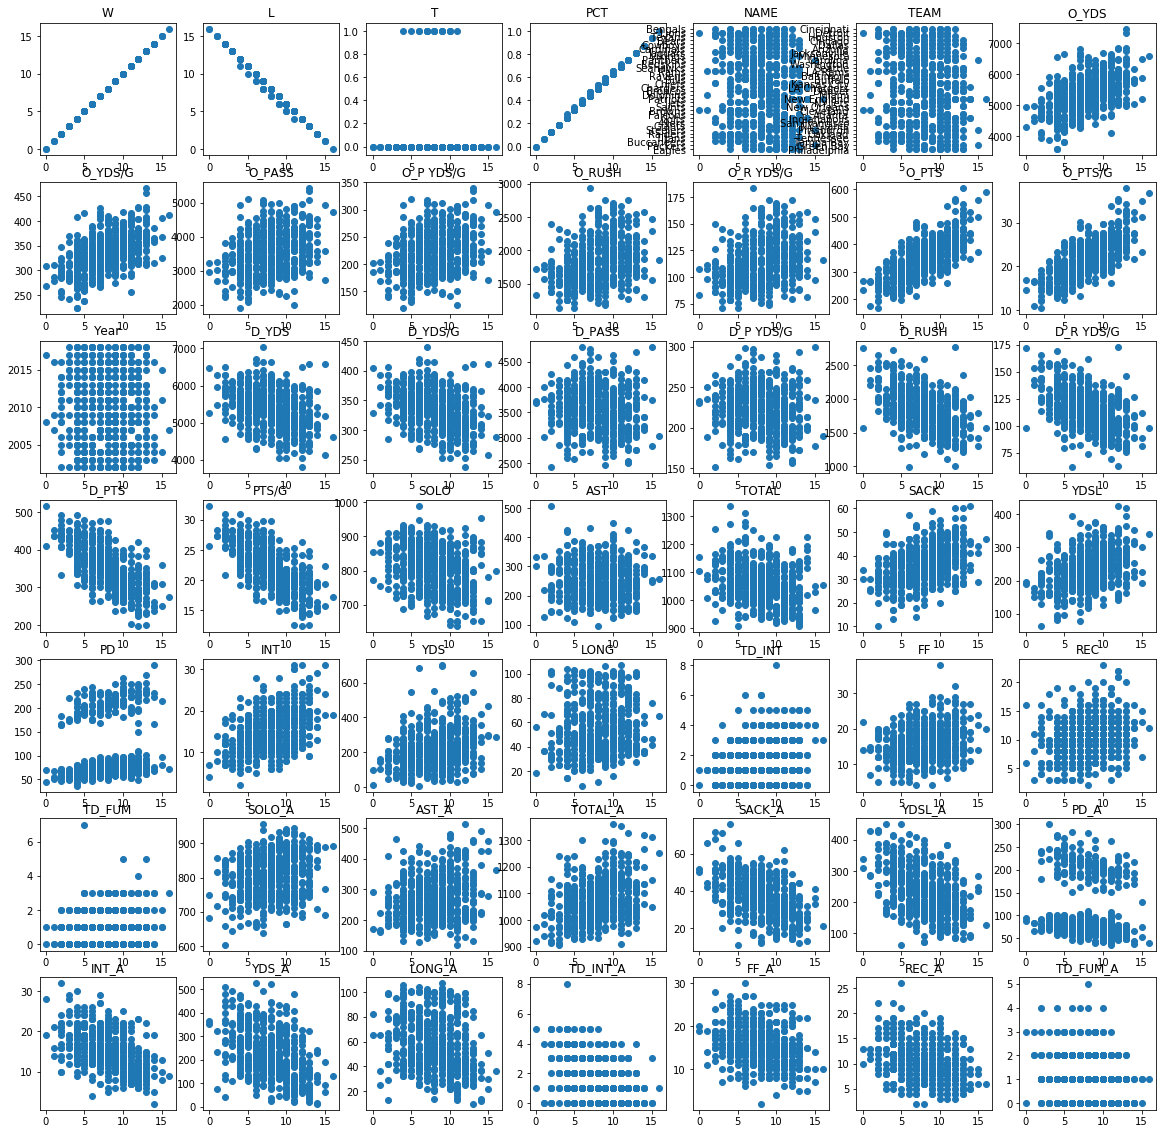

In [40]:
x = df1.W
fig, axs = plt.subplots(7, 7, figsize=(20,20))
r = 0
c = 0
t = 1
for col, row in df1.iteritems(): 

    print(r , c )
    axs[r, c].scatter(x, row)
    axs[r, c].set_title(col)
    c += 1
    t += 1
    r = (t-1)//7

    if c > 6:
        c = 0
    
    
#     c +=1 
#     while c < 7:
#         l = 0
plt.show()

In [96]:
df1.corr()

,W,L,T,PCT,O_YDS,O_YDS/G,O_PASS,O_P YDS/G,O_RUSH,O_R YDS/G,O_PTS,O_PTS/G,Year,D_YDS,D_YDS/G,D_PASS,D_P YDS/G,D_RUSH,D_R YDS/G,D_PTS,PTS/G,SOLO,AST,TOTAL,SACK,YDSL,PD,INT,YDS,LONG,TD_INT,FF,REC,TD_FUM,SOLO_A,AST_A,TOTAL_A,SACK_A,YDSL_A,PD_A,INT_A,YDS_A,LONG_A,TD_INT_A,FF_A,REC_A,TD_FUM_A
W,1.000000,-0.998304,-0.009050,0.999581,0.526763,0.526730,0.341848,0.341864,0.351774,0.351748,0.745062,0.745136,-0.003301,-0.356528,-0.356501,-0.086238,-0.086267,-0.492131,-0.492214,-0.678317,-0.678557,-0.257764,-0.030250,-0.259261,0.406679,0.418599,0.110305,0.437583,0.299260,0.148396,0.224589,0.235136,0.211749,0.138567,0.230297,0.194594,0.358033,-0.461500,-0.456381,-0.115983,-0.483618,-0.442208,-0.227137,-0.392919,-0.295274,-0.324918,-0.215287
L,-0.998304,1.000000,-0.049180,-0.999569,-0.531705,-0.531675,-0.346285,-0.346301,-0.352757,-0.352733,-0.746705,-0.746771,-0.003298,0.355619,0.355592,0.084092,0.084122,0.493627,0.493713,0.676825,0.677050,0.264814,0.023250,0.259439,-0.412706,-0.425028,-0.106402,-0.435004,-0.296277,-0.144464,-0.220409,-0.234850,-0.210055,-0.139324,-0.223768,-0.201571,-0.359224,0.459837,0.454719,0.120054,0.486256,0.441547,0.226961,0.392780,0.296008,0.326185,0.215360
T,-0.009050,-0.049180,1.000000,0.019867,0.095464,0.095507,0.083076,0.083079,0.023952,0.023984,0.043178,0.043041,0.113282,0.008441,0.008462,0.035125,0.035117,-0.035578,-0.035619,0.012000,0.012245,-0.126269,0.119619,-0.008266,0.111686,0.118846,-0.064840,-0.035499,-0.045213,-0.064554,-0.067289,-0.000197,-0.024845,0.015784,-0.107517,0.123747,0.027640,0.019290,0.019376,-0.072250,-0.055011,0.002464,-0.001542,-0.005503,-0.018543,-0.028291,-0.005572
PCT,0.999581,-0.999569,0.019867,1.000000,0.529351,0.529319,0.344163,0.344179,0.352304,0.352280,0.746153,0.746222,0.000049,-0.356196,-0.356169,-0.085131,-0.085160,-0.493139,-0.493223,-0.677897,-0.678130,-0.261397,-0.026895,-0.259575,0.409860,0.421986,0.108363,0.436552,0.298005,0.146596,0.222663,0.235109,0.211031,0.138979,0.227086,0.198037,0.358628,-0.460869,-0.455759,-0.118097,-0.485121,-0.442060,-0.227087,-0.393047,-0.295803,-0.325725,-0.215476
O_YDS,0.526763,-0.531705,0.095464,0.529351,1.000000,1.000000,0.859623,0.859607,0.270903,0.270937,0.821020,0.821045,0.261116,0.099011,0.099054,0.299811,0.299814,-0.257154,-0.257251,-0.026546,-0.026967,-0.383780,0.011703,-0.335893,0.196463,0.233799,-0.184573,0.036280,-0.000839,-0.036654,0.009719,0.052941,-0.024832,0.070475,0.132777,0.165896,0.255169,-0.454005,-0.436123,-0.266210,-0.289248,-0.243758,-0.094628,-0.176652,-0.259071,-0.269499,-0.097741
O_YDS/G,0.526730,-0.531675,0.095507,0.529319,1.000000,1.000000,0.859647,0.859631,0.270858,0.270892,0.821023,0.821047,0.261190,0.099080,0.099122,0.299890,0.299893,-0.257148,-0.257245,-0.026481,-0.026902,-0.383788,0.011695,-0.335908,0.196431,0.233760,-0.184649,0.036223,-0.000865,-0.036678,0.009723,0.052945,-0.024799,0.070480,0.132727,0.165873,0.255109,-0.454016,-0.436132,-0.266287,-0.289221,-0.243730,-0.094632,-0.176635,-0.259046,-0.269503,-0.097711
O_PASS,0.341848,-0.346285,0.083076,0.344163,0.859623,0.859647,1.000000,1.000000,-0.258949,-0.258914,0.661695,0.661613,0.309011,0.204629,0.204695,0.327226,0.327268,-0.114032,-0.114135,0.118632,0.118230,-0.307009,0.061577,-0.222584,0.107939,0.151542,-0.251881,-0.054254,-0.064323,-0.036209,-0.021146,0.003019,-0.061373,0.064930,-0.009076,0.100972,0.084505,-0.360640,-0.320171,-0.236617,-0.137701,-0.108886,-0.022305,-0.026421,-0.210401,-0.223767,-0.067458
O_P YDS/G,0.341864,-0.346301,0.083079,0.344179,0.859607,0.859631,1.000000,1.000000,-0.258978,-0.258944,0.661712,0.661631,0.308988,0.204637,0.204702,0.327223,0.327264,-0.114014,-0.114116,0.118624,0.118222,-0.307003,0.061623,-0.222539,0.107931,0.151539,-0.251906,-0.054219,-0.064312,-0.036183,-0.021168,0.003048,-0.061368,0.065010,-0.009089,0.100972,0.084494,-0.360607,-0.320156,-0.236622,-0.137704,-0.108896,-0.022299,-0.026444,-0.210479,-0.223821,-0.067517
O_RUSH,0.351774,-0.352757,0.023952,0.352304,0.270903,0.270858,-0.258949,-0.258978,1.000000,0.999999,0.305

In [103]:
y = df1['W']
X = df1[['D_RUSH', 'SACK_A', 'INT_A', 'INT', 'FF', 'FF_A', 'SACK']]

In [104]:
model = ols(formula='y~X', data=df1).fit()

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     140.6
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          6.00e-117
Time:                        16:02:57   Log-Likelihood:                -1098.4
No. Observations:                 544   AIC:                             2213.
Df Residuals:                     536   BIC:                             2247.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4838      0.929     14.509      0.000      11.658      15.309
X[0]          -0.0025      0.000     -8.521      0.000      -0.003      -0.002
X[1]          -0.0862      0.008    -10.876      0.000      -0.102      -0.071
X[2]          -0.2047      0.017    -11.977      0.000      -0.238      -0.171
X[3]           0.1577      0.017      9.410      0.000       0.125       0.191
X[4]           0.0538      0.017      3.110      0.002       0.020       0.088
X[5]          -0.0508      0.019     -2.679      0.008      -0.088      -0.014
X[6]           0.0782      0.011      6.938      0.000       0.056       0.100
==============================================================================
Omnibus:                        2.529   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.423
Skew:                           0.163   Prob(JB):                        0.298
Kurtosis:                       3.033   Cond. No.                     2.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1) sik it learn

2) polynomial , interaction

3) eda

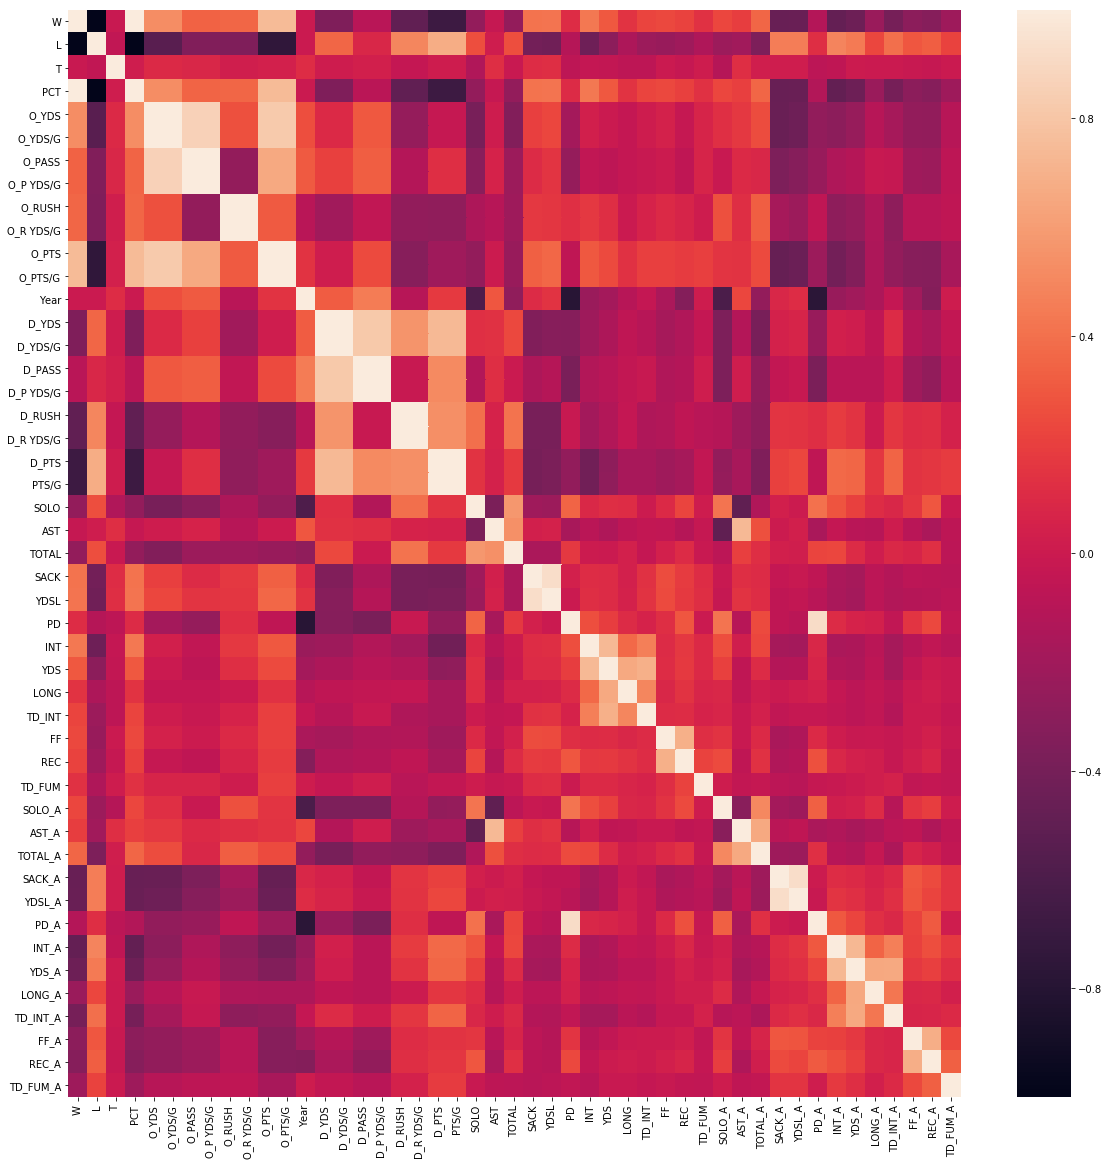

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr())


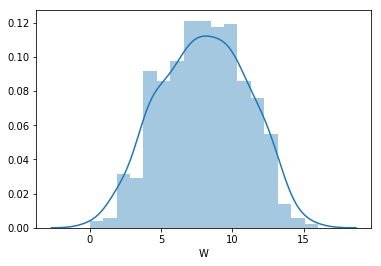

In [107]:
sns.distplot(df1["W"])

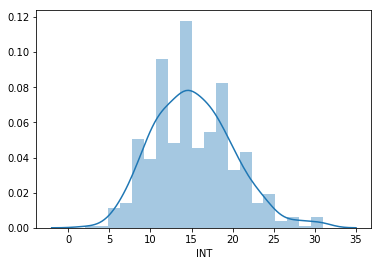

In [108]:
sns.distplot(df1["INT"])

In [124]:
sklearnmodel = LinearRegression(fit_intercept=False).fit(X, y)
r_squared = sklearnmodel.score(X, y)

In [125]:
print("Coefficients: ", sklearnmodel.coef_)
print("R2: ", r_squared)

Coefficients:  [ 0.00045577 -0.06364063 -0.15311862  0.25212553  0.10136044 -0.00284773
  0.17247363]
R2:  0.5088306150846967


In [126]:
var = ['D_RUSH', 'SACK_A', 'INT_A', 'INT', 'FF', 'FF_A', 'SACK']

In [150]:
predict = sklearnmodel.predict(np.array([[2000, 45, 15, 20, 21, 32, 35]]))

In [151]:
predict

array([8.86746082])

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


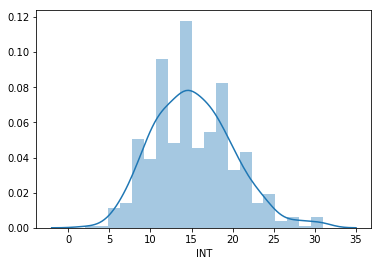

In [143]:
sns.distplot(df1['INT'])

In [169]:
picks = []
for i in range(0, 10000):
    sample = np.random.choice(df1.SACK_A, 50)
    picks.append(sample.mean())

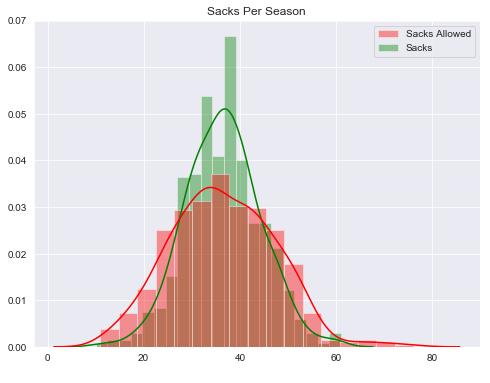

In [211]:
plt.figure(figsize=(8,6))
plt.title('Sacks Per Season', )
sns.set_style(style = 'darkgrid')
sns.distplot(df1.SACK, color='green')

sns.distplot(df1.SACK_A, color='red', axlabel=' ', label='sacks')
# plt.legend('s')
plt.legend(['Sacks Allowed', 'Sacks'])

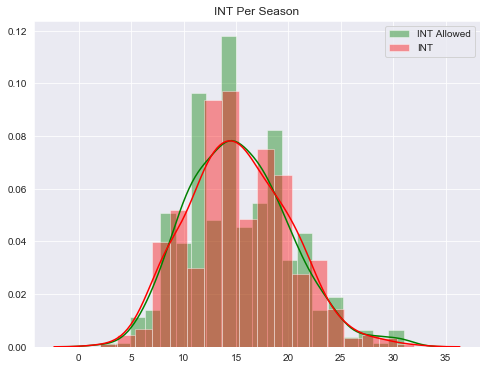

In [224]:
plt.figure(figsize=(8,6))
plt.title('INT Per Season', )
sns.set_style(style = 'darkgrid')
sns.distplot(df1.INT, color='green')
sns.distplot(df1.INT_A, color='red', axlabel=' ')
# plt.legend('s')
plt.legend(['INT Allowed', 'INT'])

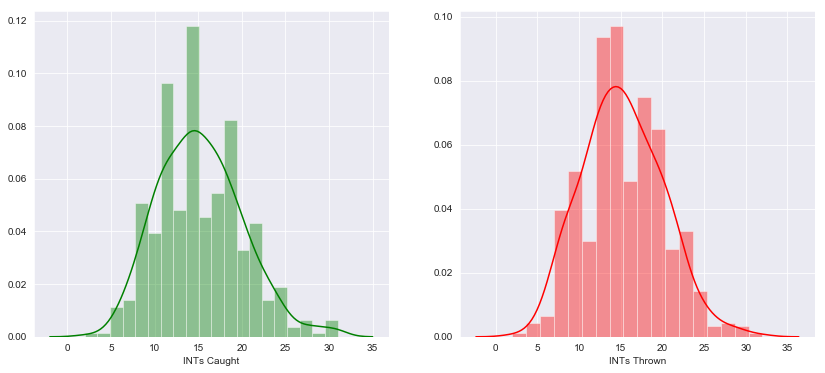

In [235]:
fig, axs = plt.subplots(1,2, figsize=(14,6))
sns.distplot(df1.INT, color='green', axlabel='INTs Caught', ax = axs[0])
sns.distplot(df1.INT_A, color='red', axlabel='INTs Thrown', ax = axs[1])